In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cancer = load_breast_cancer()

tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

scores = cross_val_score(tree,cancer.data,cancer.target,cv=5)

print('Cross Validation Score: {}'.format(scores))
print('Cross Validation Score: {:.3f}+-{:.3f}'.format(scores.mean(),scores.std()))

Cross Validation Score: [0.904 0.912 0.956 0.939 0.956]
Cross Validation Score: 0.933+-0.022


ベストスコア:0.91
その時のパラメータ(gamma,C):(0.001, 1.0)


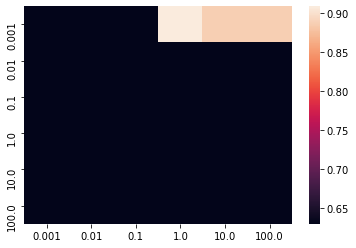

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

scores = {}
for gamma in np.logspace(-3,2,num=6):
    for C in np.logspace(-3,2,num=6):
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        scores[(gamma,C)] = svm.score(X_test,y_test)
        
scores = pd.Series(scores)

print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma,C):{}'.format(scores.idxmax()))

sns.heatmap(scores.unstack())

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

param_grid = {'C':np.logspace(-3,2,num=6),'gamma':np.logspace(-3,2,num=6)}

gs = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5)

gs.fit(X_train,y_train)

print('Best Cross Validation score : {:.3f}'.format(gs.best_score_))
print('Best parameters:{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test,y_test)))

Best Cross Validation score : 0.925
Best parameters:{'C': 1.0, 'gamma': 0.001}
Test score:0.909


In [7]:
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

model = SVC(gamma=0.001,C=1)
model.fit(X_train,y_train)

print('{} train score:{:.3f}'.format(model.__class__.__name__,model.score(X_train,y_train)))
print('{} test score:{:.3f}'.format(model.__class__.__name__,model.score(X_test,y_test)))

SVC train score:0.979
SVC test score:0.909


In [8]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

m = confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n{}'.format(m))

Confusion matrix:
[[48  5]
 [ 8 82]]
